# Titanic Data Set for predictive Analysis

### import libraries

In [22]:
import pandas as pd # helps to read the dataset
import numpy as np # used to work with with arrays multidimensiononal or single dimentional
import seaborn as sns # visualization
import matplotlib.pyplot as plt # used in visualization
%matplotlib inline 

### import data set

In [23]:
address = 'F:/ML Predictor/titanic/train.csv'
train = pd.read_csv(address)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA (Exploratory Data Analysis)

In [7]:
train.isnull() # tells whether perticular cell is null or not

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

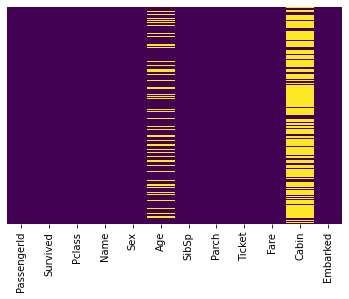

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [ ]:
# we get to know from the above map that'cabin' have the most null values. 'Age' have null values

<AxesSubplot:xlabel='Survived', ylabel='count'>

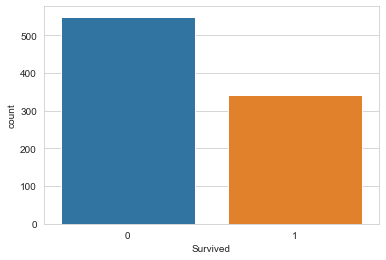

In [10]:
sns.set_style('whitegrid') # provide white grid on the background
sns.countplot(x='Survived', data=train) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

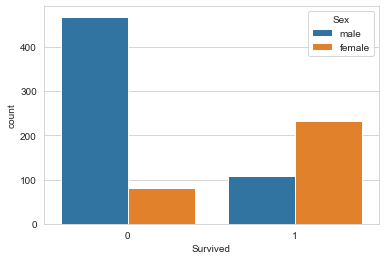

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train) # for counter plot

<AxesSubplot:xlabel='Survived', ylabel='count'>

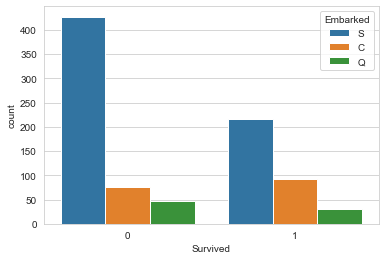

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Embarked', data=train) # for counter plot

<AxesSubplot:xlabel='Survived', ylabel='count'>

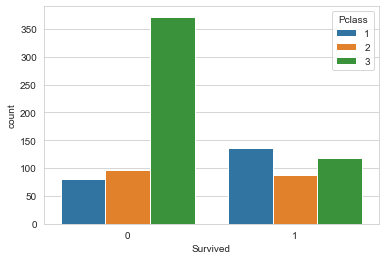

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train) # for counter plot

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

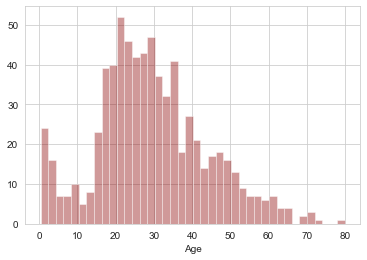

In [26]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

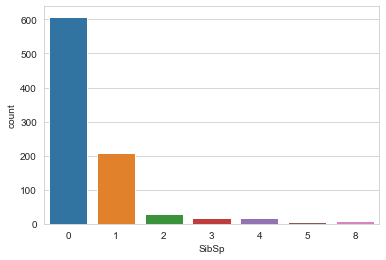

In [28]:
sns.countplot(x='SibSp', data = train)

## Data Cleaning

In [ ]:
# we have to remove null values of age and cabin column by filling avg values in it wrt Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

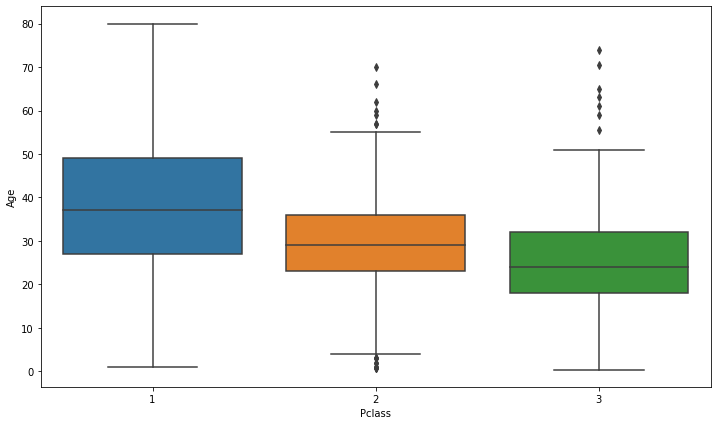

In [8]:
pt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train) # finding the mean value of age w.r.t passanger class

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 # agerage value we get from box plot
        elif Pclass == 2:
            return 29 # agerage value we get from box plot
        else:
            return 24 # agerage value we get from box plot
    else: # when age is not null
        return Age

In [28]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [ ]:
# lets now check if the null values of 'Age' are get filled or not by the help of heat plot

<AxesSubplot:>

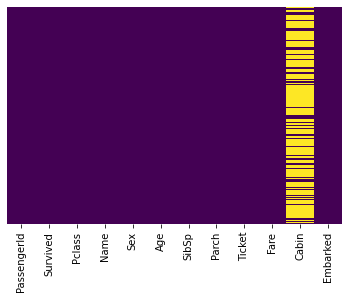

In [29]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [ ]:
# yes age column is fixed now its turn for cabin !! --> many many null values so drop it :) !!

In [32]:
train.drop('Cabin', axis=1, inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

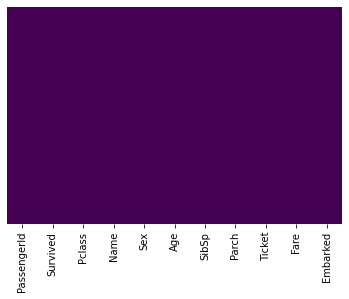

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [ ]:
# now we fixed all the null values from the data set

In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# now we see that 'PassangerId', 'Name', 'Ticket' columns does'nt play ny imp role so we drop it !!

In [ ]:
# but first we have to change the 'Sex' and 'embarked' column with numerical data 

## Converting Categorical Features 

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [37]:
pd.get_dummies(train['Embarked'], drop_first= True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
# before dropping any col which can be useful and not in the form of numerical data 
# save it as a catgorical data for improve analysis

In [43]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [48]:
train.drop(['Name', 'Sex', 'Ticket' , 'Embarked'], axis=1, inplace = True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
# now we use the categorical data i.e sex and embark that we just created with train data

In [56]:
train = pd.concat([train, sex, embark], axis=1)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# great out data is ready for our model !!

## building Logistics regression model

### Train Test Split

In [59]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [60]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [61]:
# import sklearn
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], 
                                                    test_size=0.30, random_state=101)

## Training and Predicting

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test, predictions)

In [72]:
accuracy

array([[131,  23],
       [ 41,  73]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7611940298507462

In [85]:
print('Accuracy: ')
print(accuracy*100)


Accuracy: 
76.11940298507463


In [ ]:
# See we get 76 % accuracy using simple logistic regression model